# Convolutional Neural Network

In [1]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency i

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


### Importing the libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('archive/training_set/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('archive/test_set/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 111s 441ms/step - loss: 0.6601 - accuracy: 0.5978 - val_loss: 0.6299 - val_accuracy: 0.6446
Epoch 2/25
251/251 [==============================] - 40s 158ms/step - loss: 0.5861 - accuracy: 0.6894 - val_loss: 0.6084 - val_accuracy: 0.6713
Epoch 3/25
251/251 [==============================] - 36s 143ms/step - loss: 0.5542 - accuracy: 0.7106 - val_loss: 0.5388 - val_accuracy: 0.7331
Epoch 4/25
251/251 [==============================] - 41s 164ms/step - loss: 0.5241 - accuracy: 0.7342 - val_loss: 0.5404 - val_accuracy: 0.7346
Epoch 5/25
251/251 [==============================] - 40s 160ms/step - loss: 0.4937 - accuracy: 0.7529 - val_loss: 0.5240 - val_accuracy: 0.7420
Epoch 6/25
251/251 [==============================] - 53s 212ms/step - loss: 0.4819 - accuracy: 0.7675 - val_loss: 0.4954 - val_accuracy: 0.7731
Epoch 7/25
251/251 [==============================] - 49s 194ms/step - loss: 0.4675 - accuracy: 0.7759 - val_loss: 0.4824 - val_a

## Part 4 - Making a single prediction

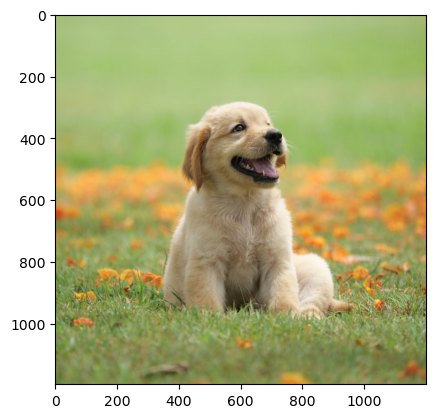

1/1 [==============================] - 0s 35ms/step


In [24]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("archive/test_1.jpg")
plt.imshow(image)
plt.show()
from keras.preprocessing import image
test_image = image.load_img('archive/test_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'




In [25]:
print(prediction)

dog
